<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.HOURLY

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))
d.add_dimension(name="interface", function="X Y Z".split())
d.add_dimension(name="const",function=3)

In [4]:
d.data

,epoch,product,product_id,interface,const
2019-01-01 00:00:00,1546300800,B,7918,X,3
2019-01-01 01:00:00,1546304400,A,8382,Y,3
2019-01-01 02:00:00,1546308000,C,3744,Z,3
2019-01-01 03:00:00,1546311600,D,4447,X,3
2019-01-01 04:00:00,1546315200,B,3924,Y,3
...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,745,Z,3
2019-01-11 21:00:00,1547240400,B,7633,X,3
2019-01-11 22:00:00,1547244000,A,9394,Y,3
2019-01-11 23:00:00,1547247600,C,8281,Z,3


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

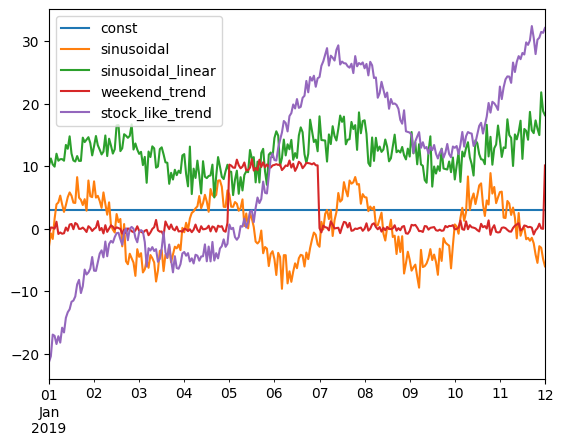

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,epoch,product,product_id,interface,const,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,B,7918,X,3,-2.841571,10.104808,-0.780262,-21.353528
2019-01-01 01:00:00,1546304400,A,8382,Y,3,-0.750842,11.231971,0.191228,-20.417192
2019-01-01 02:00:00,1546308000,C,3744,Z,3,-1.653210,10.278991,0.153067,-16.955059
2019-01-01 03:00:00,1546311600,D,4447,X,3,1.600564,9.925125,-0.005061,-17.160145
2019-01-01 04:00:00,1546315200,B,3924,Y,3,3.898800,11.996572,1.109881,-18.463879
...,...,...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,745,Z,3,-5.475094,15.994307,0.070781,30.244789
2019-01-11 21:00:00,1547240400,B,7633,X,3,-2.807350,14.978711,0.791397,30.565894
2019-01-11 22:00:00,1547244000,A,9394,Y,3,-3.059302,21.821778,0.037006,31.491438
2019-01-11 23:00:00,1547247600,C,8281,Z,3,-4.858548,18.810572,-0.031218,31.341676


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,B,X,3,10.104808,-0.780262,-21.353528
2019-01-01 01:00:00,1546304400,A,Y,3,11.231971,0.191228,-20.417192
2019-01-01 02:00:00,1546308000,C,Z,3,10.278991,0.153067,-16.955059
2019-01-01 03:00:00,1546311600,D,X,3,9.925125,-0.005061,-17.160145
2019-01-01 04:00:00,1546315200,B,Y,3,11.996572,1.109881,-18.463879
...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,Z,3,15.994307,0.070781,30.244789
2019-01-11 21:00:00,1547240400,B,X,3,14.978711,0.791397,30.565894
2019-01-11 22:00:00,1547244000,A,Y,3,21.821778,0.037006,31.491438
2019-01-11 23:00:00,1547247600,C,Z,3,18.810572,-0.031218,31.341676


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,Y,3,11.003685,0.045724,-19.744138
2019-01-01 01:00:00,1546304400,C,Z,3,10.176063,-0.053515,-18.079073
2019-01-01 02:00:00,1546308000,C,X,3,10.848699,-0.581715,-16.782948
2019-01-01 03:00:00,1546311600,D,Y,3,11.297540,-0.423741,-17.155802
2019-01-01 04:00:00,1546315200,D,Z,3,12.158709,0.689307,-14.806218
...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,D,Y,3,17.129007,0.454648,48.431043
2019-01-11 22:00:00,1547244000,C,Z,3,15.840519,-0.240247,46.767543
2019-01-11 23:00:00,1547247600,C,X,3,15.359423,-0.705715,46.054787
2019-01-12 00:00:00,1547251200,C,Y,3,16.182923,9.382729,46.168705
